## Time series modeling for air pollution monitoring with a focus on the calibration of low-cost sensors.

This lab session is based on the data and methods provided in the study by Ellen M. Considine et al.

## Problem Statement
We have PM2.5 readings from low cost sensors and we want to learn a model that maps them to "true" readings from reference FEM (AirNow) sensors 

In [961]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [962]:
training_df = pd.read_csv('data/raw_collocated_data.csv')
training_df.head()

,DateTime,PM2_5(NJH CS Collo (CS1)/Canary-S),tempf(NJH CS Collo (CS1)/Canary-S),humidity(NJH CS Collo (CS1)/Canary-S),PM2.5(NJH/AirNow),PM2_5(I-25 Glo Collo (CS2)/Canary-S),tempf(I-25 Glo Collo (CS2)/Canary-S),humidity(I-25 Glo Collo (CS2)/Canary-S),PM2_5(I-25 Glo Collo (CS3)/Canary-S),tempf(I-25 Glo Collo (CS3)/Canary-S),...,humidity(I-25 Glo Collo (CS4)/Canary-S),PM2.5(I-25 Globeville/AirNow),PM2_5(La Casa Collo (CS5)/Canary-S),tempf(La Casa Collo (CS5)/Canary-S),humidity(La Casa Collo (CS5)/Canary-S),PM2.5(La Casa/AirNow),PM2_5(Swansea Elementary Collo (CS7)/Canary-S),tempf(Swansea Elementary Collo (CS7)/Canary-S),humidity(Swansea Elementary Collo (CS7)/Canary-S),PM2.5(I-25 Denver/AirNow)
0,8/20/2018 1:00,33.6167,60.038,65.0850,22.10,38.0071,61.6481,76.7254,NaN,NaN,...,80.8741,29.5,35.4590,56.819,90.9783,21.40,1678.1202,-1.0000,-1.0000,25.40
1,8/20/2018 2:00,38.2333,58.517,67.1150,27.10,44.4808,60.2450,81.1917,NaN,NaN,...,87.1317,35.2,44.7162,56.357,90.3583,28.00,1679.1023,22.6890,36.9650,27.10
2,8/20/2018 3:00,43.3500,57.383,71.1717,28.85,51.9937,58.8231,83.8966,NaN,NaN,...,90.3083,39.8,46.7903,54.047,93.9933,29.75,1681.9920,54.5810,91.9117,28.50
3,8/20/2018 4:00,48.7000,56.546,74.7317,34.60,49.9956,57.9642,89.3667,NaN,NaN,...,93.9000,46.0,49.2235,52.550,96.2800,34.60,1750.1284,53.5348,92.6586,26.95
4,8/20/2018 5:00,39.2500,55.682,79.2033,31.50,51.0047,57.2549,92.1746,NaN,NaN,...,96.0220,48.0,42.4698,51.875,98.4000,32.10,1731.8947,52.4060,93.3633,25.70


In [963]:
training_df.columns

Index(['DateTime', 'PM2_5(NJH CS Collo (CS1)/Canary-S)',
       'tempf(NJH CS Collo (CS1)/Canary-S)',
       'humidity(NJH CS Collo (CS1)/Canary-S)', 'PM2.5(NJH/AirNow)',
       'PM2_5(I-25 Glo Collo (CS2)/Canary-S)',
       'tempf(I-25 Glo Collo (CS2)/Canary-S)',
       'humidity(I-25 Glo Collo (CS2)/Canary-S)',
       'PM2_5(I-25 Glo Collo (CS3)/Canary-S)',
       'tempf(I-25 Glo Collo (CS3)/Canary-S)',
       'humidity(I-25 Glo Collo (CS3)/Canary-S)',
       'PM2_5(I-25 Glo Collo (CS4)/Canary-S)',
       'tempf(I-25 Glo Collo (CS4)/Canary-S)',
       'humidity(I-25 Glo Collo (CS4)/Canary-S)',
       'PM2.5(I-25 Globeville/AirNow)', 'PM2_5(La Casa Collo (CS5)/Canary-S)',
       'tempf(La Casa Collo (CS5)/Canary-S)',
       'humidity(La Casa Collo (CS5)/Canary-S)', 'PM2.5(La Casa/AirNow)',
       'PM2_5(Swansea Elementary Collo (CS7)/Canary-S)',
       'tempf(Swansea Elementary Collo (CS7)/Canary-S)',
       'humidity(Swansea Elementary Collo (CS7)/Canary-S)',
       'PM2.5(I-25 Denve

## columns decriptions :
CS#: Canary sensor number # <br>
AirNow: FEM reference data source


`DateTime`: Date and time that data was registered by sensor
<hr style="border:2px solid gray">

`PM2_5(NJH CS Collo (CS1)/Canary-S)` : PM2.5 readings from CS1 located at NJH <br>
`tempf(NJH CS Collo (CS1)/Canary-S)` : Temperature (Farenheit) readings from CS2 located at NJH <br>
`humidity(NJH CS Collo (CS1)/Canary-S)` : Humidity readings from CS1 located at NJH <br>
`PM2.5 (NJH/AirNow)`: PM2.5 readings from the reference FEM sensor located at NJH
<hr style="border:2px solid gray">

`PM2_5(I-25 Glo Collo (CS2)/Canary-S)` : PM2.5 readings from CS2 sensor located at I-25 Globeville <br>
`tempf(I-25 Glo Collo (CS2)/Canary-S)` : Temperature (Farenheit) readings from CS2 located at I-25 Globeville <br>
`humidity(I-25 Glo Collo (CS2)/Canary-S)` : Humidity readings from CS2 located at I-25 Globeville <br>
<hr style="border:2px solid gray">

`PM2_5(I-25 Glo Collo (CS3)/Canary-S)` : PM2.5 readings from CS3 sensor located at I-25 Globeville <br>
`tempf(I-25 Glo Collo (CS3)/Canary-S)` : Temperature (Farenheit) readings from CS3 located at I-25 Globeville <br>
`humidity(I-25 Glo Collo (CS3)/Canary-S)` : Humidity readings from CS3 located at I-25 Globeville <br>
<hr style="border:2px solid gray">

`PM2_5(I-25 Glo Collo (CS4)/Canary-S)` : PM2.5 readings from CS4 sensor located at I-25 Globeville <br>
`tempf(I-25 Glo Collo (CS4)/Canary-S)` : Temperature (Farenheit) readings from CS4 located at I-25 Globeville <br>
`humidity(I-25 Glo Collo (CS4)/Canary-S)` : Humidity readings from CS4 located at I-25 Globeville <br>
`PM2.5(I-25 Globeville/AirNow)`: PM2.5 readings from the reference FEM sensor located at I-25 Globeville
<hr style="border:2px solid gray">

`PM2_5(La Casa Collo (CS5)/Canary-S)` : PM2.5 readings from CS5 sensor located at La Casa <br>
`tempf(La Casa Collo (CS5)/Canary-S)` : Temperature (Farenheit) readings from CS5 located at La Casa <br>
`humidity(La Casa Collo (CS5)/Canary-S)` : Humidity readings from CS5 located at La Casa <br>
`'PM2.5(La Casa/AirNow)`: PM2.5 readings from the reference FEM sensor located at La Casa
<hr style="border:2px solid gray">

`PM2_5(Swansea Elementary Collo (CS7)/Canary-S)` : PM2.5 readings from CS5 sensor located at Swansea Elementary<br>
`tempf(Swansea Elementary Collo (CS7)/Canary-S)` : Temperature (Farenheit) readings from CS5 located at Swansea Elementary <br>
`humidity(Swansea Elementary Collo (CS7)/Canary-S)` : Humidity readings from CS5 located at Swansea Elementary<br>
<hr style="border:2px solid gray">

`PM2.5(I-25 Denver/AirNow)`: PM2.5 readings from the reference FEM sensor located at I-25 Denver



## Units of Observation

* Temperature: Fahrenheit
* Humidity: grams of water vapor per kilogram of air
* PM2.5:  µ𝑔/𝑚3
 

In [964]:
# checking columns types
training_df.dtypes

DateTime                                              object
PM2_5(NJH CS Collo (CS1)/Canary-S)                   float64
tempf(NJH CS Collo (CS1)/Canary-S)                   float64
humidity(NJH CS Collo (CS1)/Canary-S)                float64
PM2.5(NJH/AirNow)                                    float64
PM2_5(I-25 Glo Collo (CS2)/Canary-S)                 float64
tempf(I-25 Glo Collo (CS2)/Canary-S)                 float64
humidity(I-25 Glo Collo (CS2)/Canary-S)              float64
PM2_5(I-25 Glo Collo (CS3)/Canary-S)                 float64
tempf(I-25 Glo Collo (CS3)/Canary-S)                 float64
humidity(I-25 Glo Collo (CS3)/Canary-S)              float64
PM2_5(I-25 Glo Collo (CS4)/Canary-S)                 float64
tempf(I-25 Glo Collo (CS4)/Canary-S)                 float64
humidity(I-25 Glo Collo (CS4)/Canary-S)              float64
PM2.5(I-25 Globeville/AirNow)                        float64
PM2_5(La Casa Collo (CS5)/Canary-S)                  float64
tempf(La Casa Collo (CS5

In [965]:
# converting Datetime to Datetime object
training_df['DateTime'] = pd.to_datetime(training_df['DateTime'])

In [966]:
training_df.dtypes

DateTime                                             datetime64[ns]
PM2_5(NJH CS Collo (CS1)/Canary-S)                          float64
tempf(NJH CS Collo (CS1)/Canary-S)                          float64
humidity(NJH CS Collo (CS1)/Canary-S)                       float64
PM2.5(NJH/AirNow)                                           float64
PM2_5(I-25 Glo Collo (CS2)/Canary-S)                        float64
tempf(I-25 Glo Collo (CS2)/Canary-S)                        float64
humidity(I-25 Glo Collo (CS2)/Canary-S)                     float64
PM2_5(I-25 Glo Collo (CS3)/Canary-S)                        float64
tempf(I-25 Glo Collo (CS3)/Canary-S)                        float64
humidity(I-25 Glo Collo (CS3)/Canary-S)                     float64
PM2_5(I-25 Glo Collo (CS4)/Canary-S)                        float64
tempf(I-25 Glo Collo (CS4)/Canary-S)                        float64
humidity(I-25 Glo Collo (CS4)/Canary-S)                     float64
PM2.5(I-25 Globeville/AirNow)                   

In [967]:
training_df.shape

(6817, 23)

rearranging dataframe, removing readings for swansea because it does not have corresponding Airnow readings and also Airnow for Denver,no coresponding cs readings

In [968]:
i15_reference_reading = "PM2.5(I-25 Globeville/AirNow)"

re_training_df = pd.DataFrame(
    np.vstack(
        [
            training_df.iloc[:, 1:5],
            pd.concat(
                [
                    training_df.iloc[:, 5:8],
                    training_df[i15_reference_reading],
                ],
                axis=1,
            ),
            pd.concat(
                [
                    training_df.iloc[:, 8:11],
                    training_df[i15_reference_reading],
                ],
                axis=1,
            ),
            training_df.iloc[:, 11:15],
            training_df.iloc[:, 15:19],
        ]
    ),
    columns=["pm_cs", "temp", "humidity", "pm_airnow"],
)

In [969]:
# creating datetime for new rows
re_training_df['Datetime'] = pd.to_datetime(
    pd.concat([training_df.iloc[:, 0]] * 5, ignore_index=True)
)

In [970]:
re_training_df

,pm_cs,temp,humidity,pm_airnow,Datetime
0,33.6167,60.038,65.0850,22.10,2018-08-20 01:00:00
1,38.2333,58.517,67.1150,27.10,2018-08-20 02:00:00
2,43.3500,57.383,71.1717,28.85,2018-08-20 03:00:00
3,48.7000,56.546,74.7317,34.60,2018-08-20 04:00:00
4,39.2500,55.682,79.2033,31.50,2018-08-20 05:00:00
...,...,...,...,...,...
34080,NaN,NaN,NaN,10.60,2019-05-30 21:00:00
34081,NaN,NaN,NaN,8.00,2019-05-30 22:00:00
34082,NaN,NaN,NaN,5.90,2019-05-30 23:00:00
34083,NaN,NaN,NaN,5.50,2019-05-31 00:00:00


`pm_cs`: PM2.5 measured from tne CS sensors (low cost) <br>
`pm_airnow`: PM2.5 measured from the AirNow sensors <br>
`date_time`: Date and time information <br>
`temp`: temperature readings <br>
`humidity`: humidity readings from the CS sensors <br>

In [971]:
re_training_df.shape

(34085, 5)

## Adding sensor location label  to data (tags)
This helps to keep track of the different sensing locations durihg our data exploration and modeling.

Because we have the same reference monitor for the three collocated sensors at i-25 Globeville, we will have to keep track of the airnow_sensor and cs_sensor differently. Below we create these 2 columns.

In [972]:
cs_sensor = ["NJH", "i25_glo_1", "i25_glo_2", "i25_glo_3", "la_casa"]
cs_sensor_label = np.repeat(cs_sensor,len(training_df))
re_training_df['cs_sensor'] = cs_sensor_label

In [973]:
# creating airnow sencor location tag
re_training_df['airnow_sensor'] = re_training_df['cs_sensor'].apply(lambda x : 'i25_glo' if x in ["i25_glo_1", "i25_glo_2", "i25_glo_3"]
                                                                   else x)

In [974]:
re_training_df

,pm_cs,temp,humidity,pm_airnow,Datetime,cs_sensor,airnow_sensor
0,33.6167,60.038,65.0850,22.10,2018-08-20 01:00:00,NJH,NJH
1,38.2333,58.517,67.1150,27.10,2018-08-20 02:00:00,NJH,NJH
2,43.3500,57.383,71.1717,28.85,2018-08-20 03:00:00,NJH,NJH
3,48.7000,56.546,74.7317,34.60,2018-08-20 04:00:00,NJH,NJH
4,39.2500,55.682,79.2033,31.50,2018-08-20 05:00:00,NJH,NJH
...,...,...,...,...,...,...,...
34080,NaN,NaN,NaN,10.60,2019-05-30 21:00:00,la_casa,la_casa
34081,NaN,NaN,NaN,8.00,2019-05-30 22:00:00,la_casa,la_casa
34082,NaN,NaN,NaN,5.90,2019-05-30 23:00:00,la_casa,la_casa
34083,NaN,NaN,NaN,5.50,2019-05-31 00:00:00,la_casa,la_casa


## Accounting for seasonal and time effects through hour, month, and weekend variables

Because of daily, weekly, and seasonal variation in atmospheric PM2.5 that may be due to factors beyond temperature and relative humidity, we will extract hour, weekend, and month  variables and convert the hour and monthvariables into cyclic values by taking the cosine and sine of  ℎ𝑜𝑢𝑟 __2π/24__
  and  𝑚𝑜𝑛𝑡ℎ __2π/12__
 .

In [975]:
# extracting hour and month data and weekends

re_training_df['Time'] = re_training_df['Datetime'].dt.hour
re_training_df['month'] = re_training_df['Datetime'].dt.month
re_training_df["weekend"] = (
    re_training_df["Datetime"].dt.dayofweek >= 4
).astype("int")

In [976]:
re_training_df

,pm_cs,temp,humidity,pm_airnow,Datetime,cs_sensor,airnow_sensor,Time,month,weekend
0,33.6167,60.038,65.0850,22.10,2018-08-20 01:00:00,NJH,NJH,1,8,0
1,38.2333,58.517,67.1150,27.10,2018-08-20 02:00:00,NJH,NJH,2,8,0
2,43.3500,57.383,71.1717,28.85,2018-08-20 03:00:00,NJH,NJH,3,8,0
3,48.7000,56.546,74.7317,34.60,2018-08-20 04:00:00,NJH,NJH,4,8,0
4,39.2500,55.682,79.2033,31.50,2018-08-20 05:00:00,NJH,NJH,5,8,0
...,...,...,...,...,...,...,...,...,...,...
34080,NaN,NaN,NaN,10.60,2019-05-30 21:00:00,la_casa,la_casa,21,5,0
34081,NaN,NaN,NaN,8.00,2019-05-30 22:00:00,la_casa,la_casa,22,5,0
34082,NaN,NaN,NaN,5.90,2019-05-30 23:00:00,la_casa,la_casa,23,5,0
34083,NaN,NaN,NaN,5.50,2019-05-31 00:00:00,la_casa,la_casa,0,5,1


In [977]:
import math

re_training_df['sin_time'] = re_training_df['Time'].apply(lambda x : math.sin(x)*2*(math.pi/24))
re_training_df['cos_time'] = re_training_df['Time'].apply(lambda x : math.cos(x)*2*(math.pi/24))

re_training_df['sin_month'] = re_training_df['month'].apply(lambda x : math.sin(x)*2*(math.pi/12))
re_training_df['cos_month'] = re_training_df['month'].apply(lambda x : math.cos(x)*2*(math.pi/12))

In [978]:
#setting threshold for true valid valyes
low = 0
high =  1500

re_training_df = re_training_df[
    (re_training_df["pm_airnow"] > low)
    &( re_training_df["pm_cs"] > low)
    & (re_training_df["temp"] > low)
    & (re_training_df["humidity"] > low)
    & (re_training_df["pm_cs"] < high)
]


re_training_df = re_training_df.dropna(
    subset=["pm_cs", "temp", "humidity", "pm_airnow"]
)

In [979]:
re_training_df.shape

(29729, 14)

## adding road length
Along with adjusting for variability in time, it is useful to investigate variability in space (location of reference sensors). The position of an air quality sensor within a city, especially relative to known sources of pollution such as highways, is likely to affect the characteristics of the air pollution in that area.


In [980]:
road_df = pd.read_csv('data/road_lengths.csv')
road_df.head()

,airnow_sensor,longitude,latitude,a_road_500
0,NJH,-104.939925,39.738578,1.995
1,i25_glo,-104.988878,39.785902,1.295
2,la_casa,-105.005191,39.779467,1.727
3,CAMP,-104.987625,39.751184,6.850
4,i25_denver,-105.015317,39.732146,2.195


In [981]:
# merging road_df to re_training_df

re_training_df = road_df.merge(re_training_df,on = 'airnow_sensor')

In [982]:
re_training_df

,airnow_sensor,longitude,latitude,a_road_500,pm_cs,temp,humidity,pm_airnow,Datetime,cs_sensor,Time,month,weekend,sin_time,cos_time,sin_month,cos_month
0,NJH,-104.939925,39.738578,1.995,33.6167,60.0380,65.0850,22.10,2018-08-20 01:00:00,NJH,1,8,0,0.220297,0.141451,0.518027,-0.076184
1,NJH,-104.939925,39.738578,1.995,38.2333,58.5170,67.1150,27.10,2018-08-20 02:00:00,NJH,2,8,0,0.238054,-0.108947,0.518027,-0.076184
2,NJH,-104.939925,39.738578,1.995,43.3500,57.3830,71.1717,28.85,2018-08-20 03:00:00,NJH,3,8,0,0.036945,-0.259179,0.518027,-0.076184
3,NJH,-104.939925,39.738578,1.995,48.7000,56.5460,74.7317,34.60,2018-08-20 04:00:00,NJH,4,8,0,-0.198130,-0.171123,0.518027,-0.076184
4,NJH,-104.939925,39.738578,1.995,39.2500,55.6820,79.2033,31.50,2018-08-20 05:00:00,NJH,5,8,0,-0.251046,0.074263,0.518027,-0.076184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29724,la_casa,-105.005191,39.779467,1.727,1.9518,68.7260,46.2100,4.10,2019-05-27 20:00:00,la_casa,20,5,0,0.239009,0.106836,-0.502092,0.148525
29725,la_casa,-105.005191,39.779467,1.727,2.4398,61.4498,81.8610,4.30,2019-05-27 21:00:00,la_casa,21,5,0,0.219036,-0.143395,-0.502092,0.148525
29726,la_casa,-105.005191,39.779467,1.727,0.5536,56.7620,94.9717,3.30,2019-05-27 22:00:00,la_casa,22,5,0,-0.002317,-0.261789,-0.502092,0.148525
29727,la_casa,-105.005191,39.779467,1.727,0.4335,56.0734,96.4948,2.70,2019-05-27 23:00:00,la_casa,23,5,0,-0.221540,-0.139495,-0.502092,0.148525


In [983]:
# saving data
re_training_df.to_csv('cleaned_trained_data.csv',index = False)

## Feature engineering for test data

In [984]:
# load test data
test_df_1 = pd.read_csv('data/test-set_Nov-Dec.csv')
test_df_2 = pd.read_csv('data/test-set_Sept-Oct.csv')

In [985]:
test_df_1.head()

,DateTime,PM2_5(CAMP Collo (CS13)/Canary-S),PM2_52(CAMP Collo (CS13)/Canary-S),Temp(CAMP Collo (CS13)/Canary-S),Hmdty(CAMP Collo (CS13)/Canary-S),PM2_5(I-25 Denver Collo (CS16)/Canary-S),PM2_52(I-25 Denver Collo (CS16)/Canary-S),Temp(I-25 Denver Collo (CS16)/Canary-S),Hmdty(I-25 Denver Collo (CS16)/Canary-S),PM2.5(CAMP/AirNow),PM2.5(I-25 Denver/AirNow)
0,2019-11-01 01:00:00,41.7772,39.6055,31.9566,80.6328,47.9812,49.1725,34.5328,54.2232,NaN,20.4
1,2019-11-01 02:00:00,44.9492,42.4250,31.1570,87.8583,51.4340,53.1133,33.4683,58.0150,NaN,22.0
2,2019-11-01 03:00:00,45.6350,43.2730,29.1430,89.7467,53.3320,55.1397,32.3287,61.0565,NaN,23.3
3,2019-11-01 04:00:00,46.5482,44.2198,28.7460,89.5550,55.9592,57.7683,32.0738,63.3500,NaN,24.9
4,2019-11-01 05:00:00,43.7972,41.3442,29.2220,89.3917,52.6052,54.6040,31.9597,61.0929,NaN,22.8


In [986]:
test_df_2.head()

,DateTime,PM2_5(CAMP Collo (CS13)/Canary-S),PM2_52(CAMP Collo (CS13)/Canary-S),Temp(CAMP Collo (CS13)/Canary-S),Hmdty(CAMP Collo (CS13)/Canary-S),PM2_5(I-25 Denver Collo (CS16)/Canary-S),PM2_52(I-25 Denver Collo (CS16)/Canary-S),Temp(I-25 Denver Collo (CS16)/Canary-S),Hmdty(I-25 Denver Collo (CS16)/Canary-S),PM2.5(CAMP/AirNow),PM2.5(I-25 Denver/AirNow)
0,2019-09-03 01:00:00,NaN,NaN,NaN,NaN,16.6236,15.8221,82.1851,20.0231,7.50,NaN
1,2019-09-03 02:00:00,NaN,NaN,NaN,NaN,10.8216,10.1926,79.5585,19.4477,6.95,NaN
2,2019-09-03 03:00:00,NaN,NaN,NaN,NaN,11.9641,11.2841,76.9530,23.0715,6.30,NaN
3,2019-09-03 04:00:00,NaN,NaN,NaN,NaN,8.3010,8.1568,74.6737,24.3077,6.30,NaN
4,2019-09-03 05:00:00,NaN,NaN,NaN,NaN,6.6653,6.3072,72.3845,27.5498,5.20,NaN


In [987]:
test_df_1.dtypes

DateTime                                      object
PM2_5(CAMP Collo (CS13)/Canary-S)            float64
PM2_52(CAMP Collo (CS13)/Canary-S)           float64
Temp(CAMP Collo (CS13)/Canary-S)             float64
Hmdty(CAMP Collo (CS13)/Canary-S)            float64
PM2_5(I-25 Denver Collo (CS16)/Canary-S)     float64
PM2_52(I-25 Denver Collo (CS16)/Canary-S)    float64
Temp(I-25 Denver Collo (CS16)/Canary-S)      float64
Hmdty(I-25 Denver Collo (CS16)/Canary-S)     float64
PM2.5(CAMP/AirNow)                           float64
PM2.5(I-25 Denver/AirNow)                    float64
dtype: object

In [988]:
test_df_1.dtypes

DateTime                                      object
PM2_5(CAMP Collo (CS13)/Canary-S)            float64
PM2_52(CAMP Collo (CS13)/Canary-S)           float64
Temp(CAMP Collo (CS13)/Canary-S)             float64
Hmdty(CAMP Collo (CS13)/Canary-S)            float64
PM2_5(I-25 Denver Collo (CS16)/Canary-S)     float64
PM2_52(I-25 Denver Collo (CS16)/Canary-S)    float64
Temp(I-25 Denver Collo (CS16)/Canary-S)      float64
Hmdty(I-25 Denver Collo (CS16)/Canary-S)     float64
PM2.5(CAMP/AirNow)                           float64
PM2.5(I-25 Denver/AirNow)                    float64
dtype: object

In [989]:
test_df_1['DateTime'] = pd.to_datetime(test_df_1['DateTime'])
test_df_2['DateTime'] = pd.to_datetime(test_df_2['DateTime'])

In [990]:
# creating function to organise test data
def organise_test_data(df):

    """
    Utility function to organise our test data

    """

    new_data = pd.DataFrame(
        np.vstack(
            [
                pd.concat(
                    [df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 3:5], df.iloc[:, 9]],
                    axis=1,
                ),
                pd.concat(
                    [df.iloc[:, 0], df.iloc[:, 5], df.iloc[:, 7:9], df.iloc[:, 10]],
                    axis=1,
                ),
            ]
        ),
        columns=["Datetime", "pm_cs", "temp", "humidity", "pm_airnow"]
    )

    camp_sensor_column = ["CAMP"] * len(df)
    denvor_sensor_column = ["i25_denver"] * len(df)
    new_data["airnow_sensor"] = camp_sensor_column + denvor_sensor_column

    return new_data

In [991]:
test_df_stacked_1 = organise_test_data(test_df_1)
test_df_stacked_2 = organise_test_data(test_df_2)

In [992]:
full_test_data = pd.concat([test_df_stacked_1, test_df_stacked_2], axis=0)
full_test_data["cs_sensor"] = full_test_data["airnow_sensor"]

In [993]:
# settinh thresholds

full_test_data = full_test_data[
    (full_test_data["pm_airnow"] > low)
    & (full_test_data["pm_cs"] > low)
    & (full_test_data["temp"] > low)
    & (full_test_data["humidity"] > low)
    & (full_test_data["pm_cs"] < high)
]

full_test_data = full_test_data.dropna(
    subset=["pm_cs", "temp", "humidity", "pm_airnow"]
)

In [994]:
full_test_data.shape

(3006, 7)

In [995]:
full_test_data.dtypes

Datetime         datetime64[ns]
pm_cs                    object
temp                     object
humidity                 object
pm_airnow                object
airnow_sensor            object
cs_sensor                object
dtype: object

In [996]:
full_test_data[['pm_cs','temp','humidity','pm_airnow']]=full_test_data[['pm_cs','temp','humidity','pm_airnow']].astype(int)

In [997]:
full_test_data.dtypes

Datetime         datetime64[ns]
pm_cs                     int32
temp                      int32
humidity                  int32
pm_airnow                 int32
airnow_sensor            object
cs_sensor                object
dtype: object

In [998]:
# adding day,month and weekend columns to dataframe

full_test_data['Time'] = full_test_data['Datetime'].dt.hour
full_test_data['month'] = full_test_data['Datetime'].dt.month

full_test_data['weekend'] = (full_test_data['Datetime'].dt.dayofweek >= 4).astype(int)

#### Adding cyclical enconding to hour and month  labels

In [999]:
full_test_data['sin_time'] = full_test_data['Time'].apply(lambda x : math.sin(x) * 2 / (math.pi/24))
full_test_data['cos_time'] = full_test_data['Time'].apply(lambda x : math.cos(x) * 2 / (math.pi/24))

full_test_data['sin_month'] = full_test_data['month'].apply(lambda x : math.cos(x) * 2 / (math.pi/12))
full_test_data['cos_month'] = full_test_data['month'].apply(lambda x : math.cos(x) * 2 / (math.pi/12))

In [1000]:
# mergring road data

full_test_data = road_df.merge(full_test_data,on = 'airnow_sensor')

In [1001]:
full_test_data.head()

,airnow_sensor,longitude,latitude,a_road_500,Datetime,pm_cs,temp,humidity,pm_airnow,cs_sensor,Time,month,weekend,sin_time,cos_time,sin_month,cos_month
0,CAMP,-104.987625,39.751184,6.85,2019-09-03 12:00:00,6,74,40,8,CAMP,12,9,0,-8.198230,12.893139,-6.960522,-6.960522
1,CAMP,-104.987625,39.751184,6.85,2019-09-03 14:00:00,14,92,35,9,CAMP,14,9,0,15.135366,2.089191,-6.960522,-6.960522
2,CAMP,-104.987625,39.751184,6.85,2019-09-03 15:00:00,15,96,33,10,CAMP,15,9,0,9.935666,-11.607176,-6.960522,-6.960522
3,CAMP,-104.987625,39.751184,6.85,2019-09-03 16:00:00,12,97,32,9,CAMP,16,9,0,-4.398839,-14.631959,-6.960522,-6.960522
4,CAMP,-104.987625,39.751184,6.85,2019-09-03 17:00:00,10,98,30,8,CAMP,17,9,0,-14.689072,-4.204186,-6.960522,-6.960522


In [1002]:
full_test_data.dtypes

airnow_sensor            object
longitude               float64
latitude                float64
a_road_500              float64
Datetime         datetime64[ns]
pm_cs                     int32
temp                      int32
humidity                  int32
pm_airnow                 int32
cs_sensor                object
Time                      int64
month                     int64
weekend                   int32
sin_time                float64
cos_time                float64
sin_month               float64
cos_month               float64
dtype: object

In [1003]:
# saving test data

full_test_data.to_csv('test_data.csv',index = False)

## EXPLORATORY DATA ANALYSIS (EDA)

In [1004]:
import geopandas
import contextily as cx

In [1005]:
# combining test and train data together for exploratory analysis

full_data = pd.concat([re_training_df,full_test_data],axis = 0)

In [1006]:
full_data.head()

,airnow_sensor,longitude,latitude,a_road_500,pm_cs,temp,humidity,pm_airnow,Datetime,cs_sensor,Time,month,weekend,sin_time,cos_time,sin_month,cos_month
0,NJH,-104.939925,39.738578,1.995,33.6167,60.038,65.0850,22.10,2018-08-20 01:00:00,NJH,1,8,0,0.220297,0.141451,0.518027,-0.076184
1,NJH,-104.939925,39.738578,1.995,38.2333,58.517,67.1150,27.10,2018-08-20 02:00:00,NJH,2,8,0,0.238054,-0.108947,0.518027,-0.076184
2,NJH,-104.939925,39.738578,1.995,43.3500,57.383,71.1717,28.85,2018-08-20 03:00:00,NJH,3,8,0,0.036945,-0.259179,0.518027,-0.076184
3,NJH,-104.939925,39.738578,1.995,48.7000,56.546,74.7317,34.60,2018-08-20 04:00:00,NJH,4,8,0,-0.198130,-0.171123,0.518027,-0.076184
4,NJH,-104.939925,39.738578,1.995,39.2500,55.682,79.2033,31.50,2018-08-20 05:00:00,NJH,5,8,0,-0.251046,0.074263,0.518027,-0.076184


In [1007]:
full_data.dtypes

airnow_sensor            object
longitude               float64
latitude                float64
a_road_500              float64
pm_cs                   float64
temp                    float64
humidity                float64
pm_airnow               float64
Datetime         datetime64[ns]
cs_sensor                object
Time                      int64
month                     int64
weekend                   int32
sin_time                float64
cos_time                float64
sin_month               float64
cos_month               float64
dtype: object

In [1008]:
full_data.isnull().sum()

airnow_sensor    0
longitude        0
latitude         0
a_road_500       0
pm_cs            0
temp             0
humidity         0
pm_airnow        0
Datetime         0
cs_sensor        0
Time             0
month            0
weekend          0
sin_time         0
cos_time         0
sin_month        0
cos_month        0
dtype: int64

## 1. Plot latitude and langitude of each sensing location with basemap to provide context.

In [1009]:
location = full_data[['airnow_sensor','longitude','latitude']].groupby(by = 'airnow_sensor').nth(0).reset_index()

In [1010]:
location

,airnow_sensor,longitude,latitude
0,CAMP,-104.987625,39.751184
1,NJH,-104.939925,39.738578
2,i25_denver,-105.015317,39.732146
3,i25_glo,-104.988878,39.785902
4,la_casa,-105.005191,39.779467


In [1011]:
geo_df = geopandas.GeoDataFrame(
    location,
    geometry=geopandas.points_from_xy(location.longitude, location.latitude),
)

geo_df = geo_df.set_crs("epsg:4326")

geo_df

,airnow_sensor,longitude,latitude,geometry
0,CAMP,-104.987625,39.751184,POINT (-104.98762 39.75118)
1,NJH,-104.939925,39.738578,POINT (-104.93993 39.73858)
2,i25_denver,-105.015317,39.732146,POINT (-105.01532 39.73215)
3,i25_glo,-104.988878,39.785902,POINT (-104.98888 39.78590)
4,la_casa,-105.005191,39.779467,POINT (-105.00519 39.77947)


In [1012]:
geo_df.dtypes

airnow_sensor      object
longitude         float64
latitude          float64
geometry         geometry
dtype: object

ConnectionError: HTTPSConnectionPool(host='stamen-tiles-a.a.ssl.fastly.net', port=443): Max retries exceeded with url: /terrain/14/3412/6215.png (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EC9B33D610>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

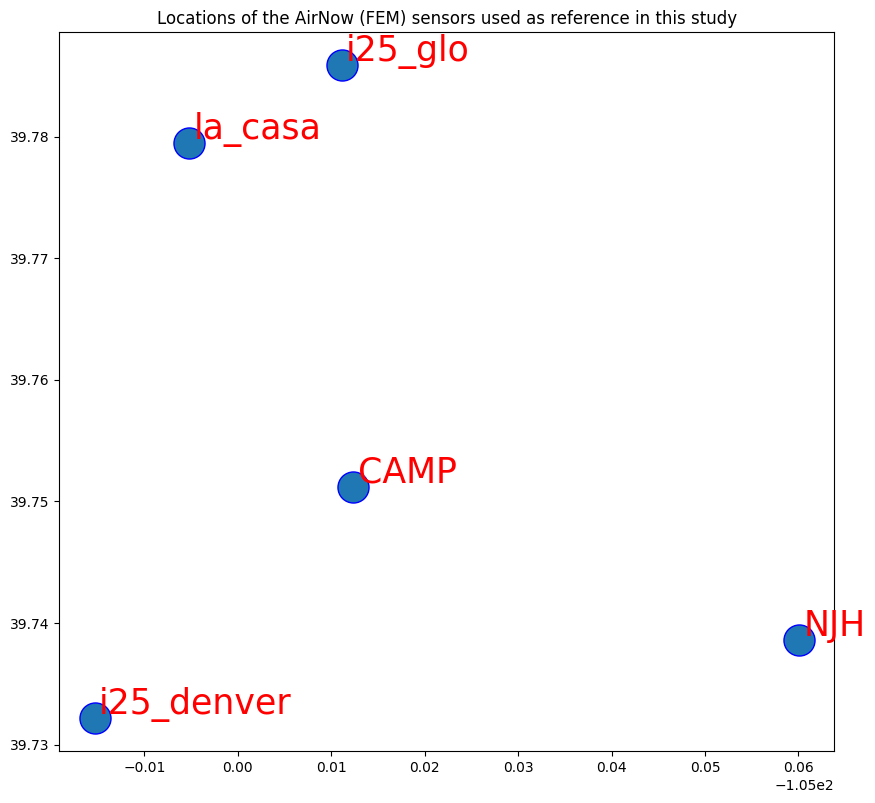

In [1013]:
ax = geo_df.plot(
    figsize=(10, 10),
    alpha=1,
    edgecolor="b",
    legend=True,
    markersize=500,
    legend_kwds={"labels": geo_df["airnow_sensor"]},
)

for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df["airnow_sensor"]):
    ax.annotate(
        label,
        xy=(x, y),
        xytext=(3, 3),
        textcoords="offset points",
        fontsize=25,
        color="r",
    )
plt.title("Locations of the AirNow (FEM) sensors used as reference in this study")
cx.add_basemap(ax, crs=geo_df.crs)

* The National Jewish Hospital (NJH) is farther away from the highway than the rest of the monitor locations. CAMP is also reltively far from large roads. This should have potential impact on how much and the variability of the PM2.5 atmospheric content sensed in these locations.

## exploring road length

lenth of road surrounding each sensor in a 500m buffer

In [1014]:
road = full_data[['airnow_sensor','a_road_500']].groupby('airnow_sensor').nth(0).reset_index()

In [1015]:
road

,airnow_sensor,a_road_500
0,CAMP,6.850
1,NJH,1.995
2,i25_denver,2.195
3,i25_glo,1.295
4,la_casa,1.727


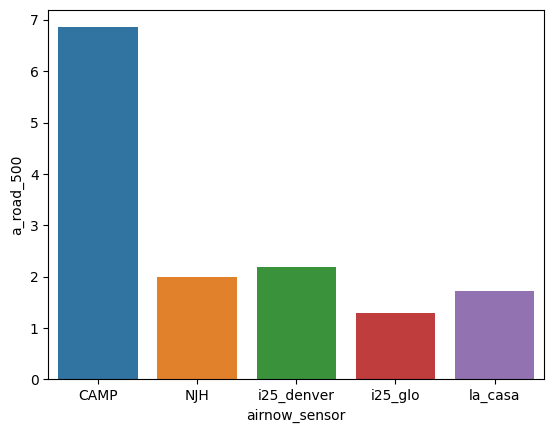

In [1016]:
sns.barplot(data = road,x = 'airnow_sensor',y = 'a_road_500');

* CAMP has the highest road length, which might intend increase the air polution around that sensor but this roads aren't highways and might not be too busy

# Summary statistics of our data

###### Training

In [1017]:
re_training_df.groupby("cs_sensor")[["pm_airnow"]].describe()

pm_airnow                                                   
              count       mean       std  min  25%  50%      75%   max
cs_sensor                                                             
NJH          5271.0   7.688446  6.720115  0.8  3.8  5.8   8.9000  74.2
i25_glo_1    6030.0  11.032040  8.458745  0.2  5.3  8.8  14.1875  72.8
i25_glo_2    5964.0  10.382705  7.003322  0.2  5.3  8.6  13.6000  54.1
i25_glo_3    6113.0  10.983592  8.409551  0.2  5.3  8.8  14.1000  72.8
la_casa      6351.0   8.251268  7.115029  0.2  4.0  6.3  10.1000  76.5

###### Test

In [1018]:
full_test_data.groupby("cs_sensor")[["pm_airnow"]].describe()

pm_airnow                                              
               count      mean       std  min  25%  50%  75%   max
cs_sensor                                                         
CAMP           737.0  5.877883  3.609884  0.0  3.0  5.0  7.0  27.0
i25_denver    2269.0  7.322609  5.735954  0.0  3.0  6.0  9.0  56.0

**Observations**

- NJH in training and CAMP in test data show relatively lower median values<br>
- The IQR for both NJH and CAMP are also lower than the rest.


### Summary statistics of the CS (low-cost) sensor data?

Remember, the column named `cs_sensor`provides the CS sensor tag for each data row and column named `pm_cs` contains the CA sensor data

###### Training

In [1019]:
re_training_df.groupby("cs_sensor")[["pm_cs"]].describe()

pm_cs                                                              \
            count       mean        std     min       25%      50%        75%   
cs_sensor                                                                       
NJH        5271.0   7.686516  10.103100  0.0002  1.236950  4.06730   9.815800   
i25_glo_1  6030.0  12.206982  12.716104  0.0013  3.547275  8.11415  16.135200   
i25_glo_2  5964.0   9.139192   9.097960  0.0012  2.709325  6.44350  12.300825   
i25_glo_3  6113.0  10.878979  11.726322  0.0028  3.019500  7.10320  13.997800   
la_casa    6351.0  10.415315  11.930823  0.0002  2.414350  6.39780  13.563700   

                     
                max  
cs_sensor            
NJH         91.7998  
i25_glo_1  170.6577  
i25_glo_2   75.0854  
i25_glo_3   99.0358  
la_casa    104.0073

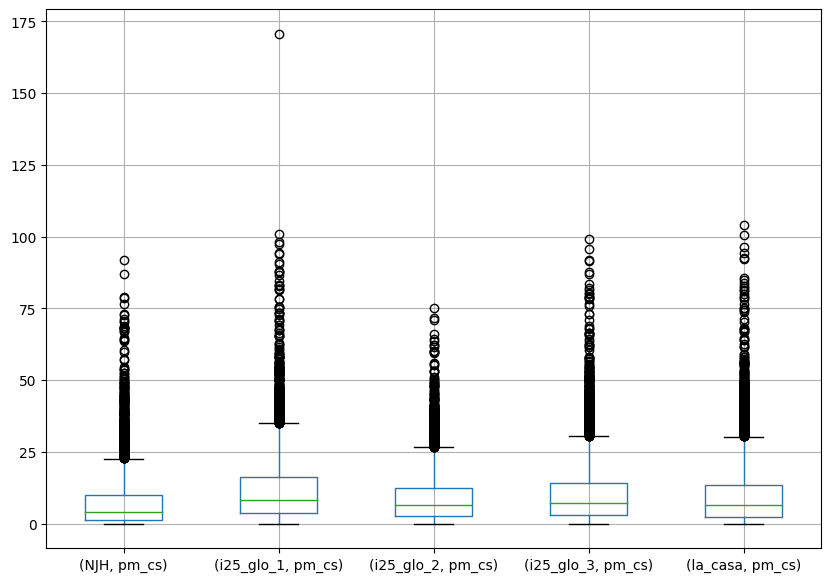

In [1020]:

re_training_df[["cs_sensor", "pm_cs"]].groupby("cs_sensor")[["pm_cs"]].boxplot(
    subplots=False, figsize=(10, 7)
)
plt.show()

###### Test

In [1021]:
full_test_data.groupby("cs_sensor")[["pm_cs"]].describe()

pm_cs                                                 
             count       mean        std  min  25%  50%   75%   max
cs_sensor                                                          
CAMP         737.0   5.040706   4.861503  0.0  2.0  4.0   7.0  30.0
i25_denver  2269.0  10.690613  11.573491  0.0  3.0  7.0  14.0  68.0

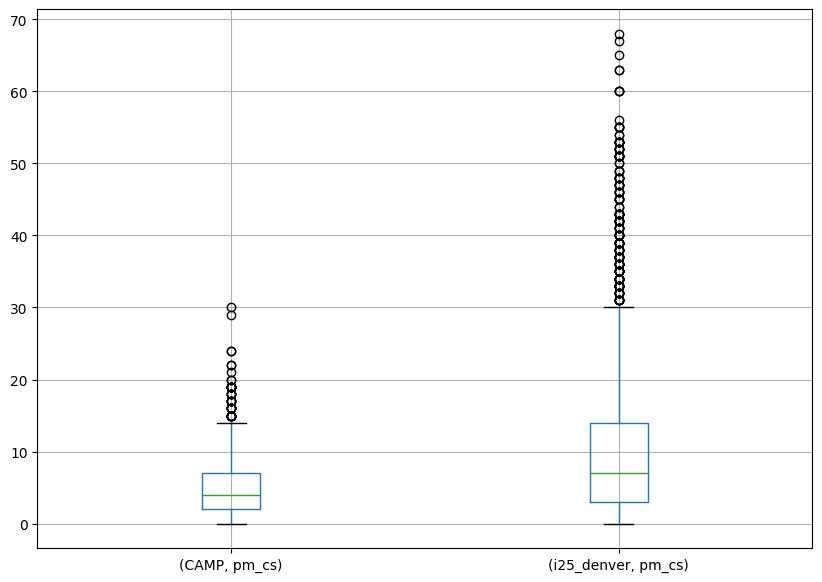

In [1022]:
full_test_data[["cs_sensor", "pm_cs"]].groupby("cs_sensor")[["pm_cs"]].boxplot(
    subplots=False, figsize=(10, 7)
)
plt.show()

- Take note of the IQR for CAMP and NJH. The IQR in these locations are lower than in the other locations. CAMP and NJH are farther away from the express way (see map).

## comparing airnow_sensor and cs_sensor

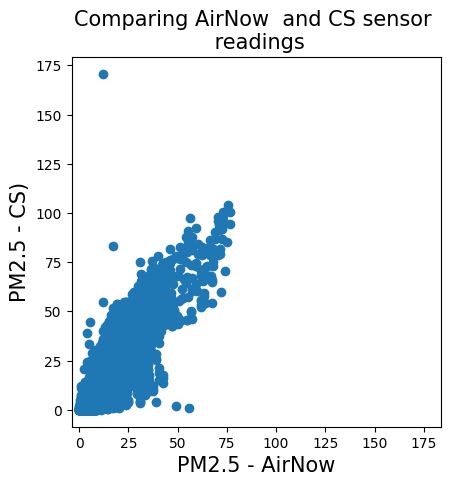

In [1023]:
plt.scatter(full_data["pm_airnow"], full_data["pm_cs"])
plt.ylabel("PM2.5 - CS)", size=15)
plt.xlabel("PM2.5 - AirNow", size=15)
plt.title("Comparing AirNow  and CS sensor \n readings", size=15)
plt.axis("square")
plt.show()

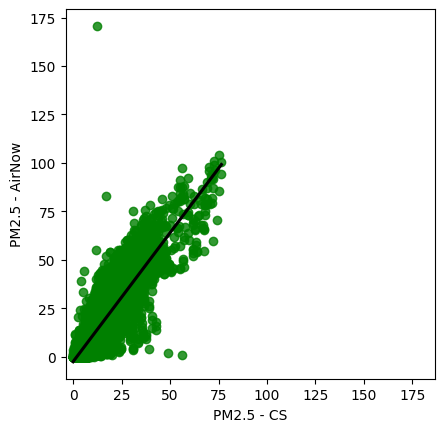

In [1024]:
ax = sns.regplot(
    x=full_data["pm_airnow"],
    y=full_data["pm_cs"],
    color="green",
    line_kws={"color": "black"},
)

ax.set(xlabel="PM2.5 - CS", ylabel="PM2.5 - AirNow")
plt.axis("square")
plt.show()

* The need for correction. A linear model is useful for this.
* A linear model could find the line of best fit here. We might not even need data other confounding variables to have a good starting model.

In [1025]:
#We can split our data by CS sensors to observe if there are any significant changes with respect to what has been observed over the whole data.

njh_data = full_data[full_data["cs_sensor"] == "NJH"]
i25_glo1_data = full_data[full_data["cs_sensor"] == "i25_glo_1"]
i25_glo2_data = full_data[full_data["cs_sensor"] == "i25_glo_2"]
i25_glo3_data = full_data[full_data["cs_sensor"] == "i25_glo_3"]
lacasa_data = full_data[full_data["cs_sensor"] == "la_casa"]
camp_data = full_data[full_data["cs_sensor"] == "CAMP"]
i25_denver_data = full_data[full_data["cs_sensor"] == "i25_denver"]

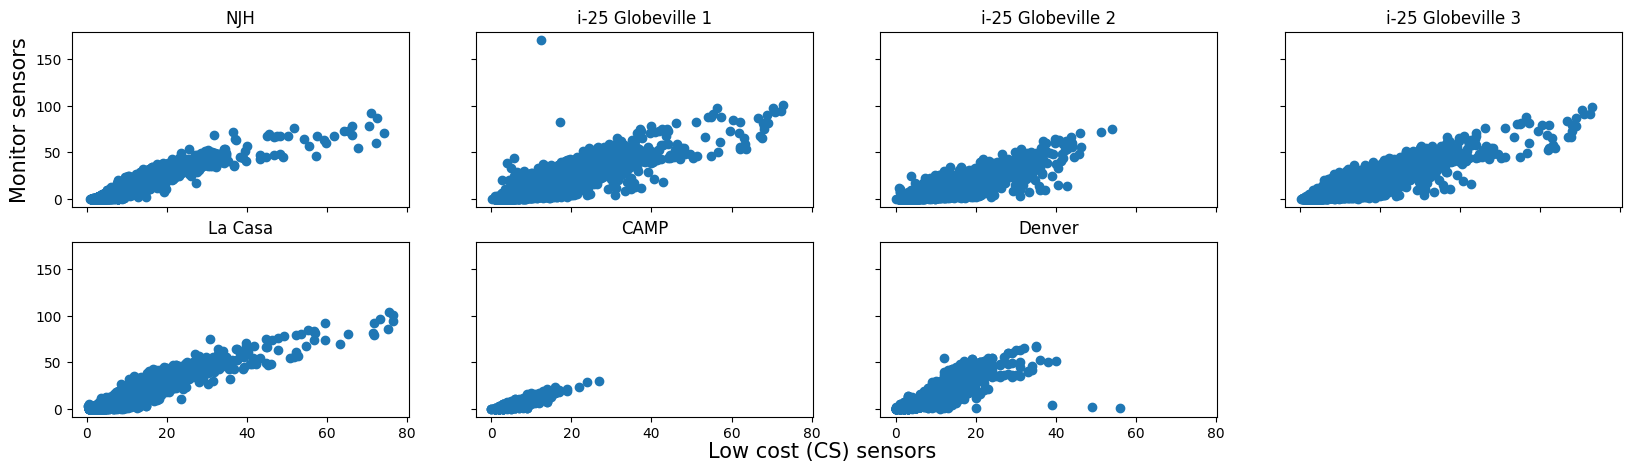

In [1026]:
fig, [(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)] = plt.subplots(
    nrows=2, ncols=4, figsize=(20, 5), sharex=True, sharey=True
)

ax1.scatter(njh_data["pm_airnow"], njh_data["pm_cs"])
ax1.set_title("NJH")

ax2.scatter(i25_glo1_data["pm_airnow"], i25_glo1_data["pm_cs"])
ax2.set_title("i-25 Globeville 1")
ax3.scatter(i25_glo2_data["pm_airnow"], i25_glo2_data["pm_cs"])
ax3.set_title("i-25 Globeville 2")
ax4.scatter(i25_glo3_data["pm_airnow"], i25_glo3_data["pm_cs"])
ax4.set_title("i-25 Globeville 3")
ax5.scatter(lacasa_data["pm_airnow"], lacasa_data["pm_cs"])
ax5.set_title("La Casa")
ax6.scatter(camp_data["pm_airnow"], camp_data["pm_cs"])
ax6.set_title("CAMP")

ax7.scatter(i25_denver_data["pm_airnow"], i25_denver_data["pm_cs"])
ax7.set_title("Denver")

ax8.axis("off")

ax1.set_ylabel("Monitor sensors", size=15)
fig.text(0.5, 0.04, "Low cost (CS) sensors", ha="center", va="center", size=15)

plt.show()

#### observation :
* Some potential outlier measures at I-25 Globeville 1
* No much indeication of heteroscadascity

#  Historgrams comparing AirNow and CS PM2.5 

###### Choosing bin size.

One simple rule is [Sturge’s rule](https://www.researchgate.net/publication/230257056_Sturges'_rule)

$K = 1 + 3.22 log(N)$

where,

K is the number of bins

N is the number of observations

In [1027]:
def bin_size(n_observations):

    return math.ceil(1 + (3.22 * math.log(n_observations)))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


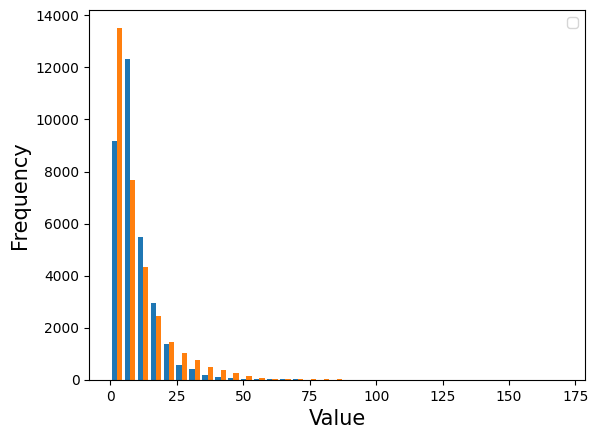

In [1028]:
plt.hist(
    [full_data["pm_airnow"], full_data["pm_cs"]],
    bins=bin_size(len(full_data)),
)
plt.xlabel("Value", size=15)
plt.ylabel("Frequency", size=15)
plt.legend()
plt.show()

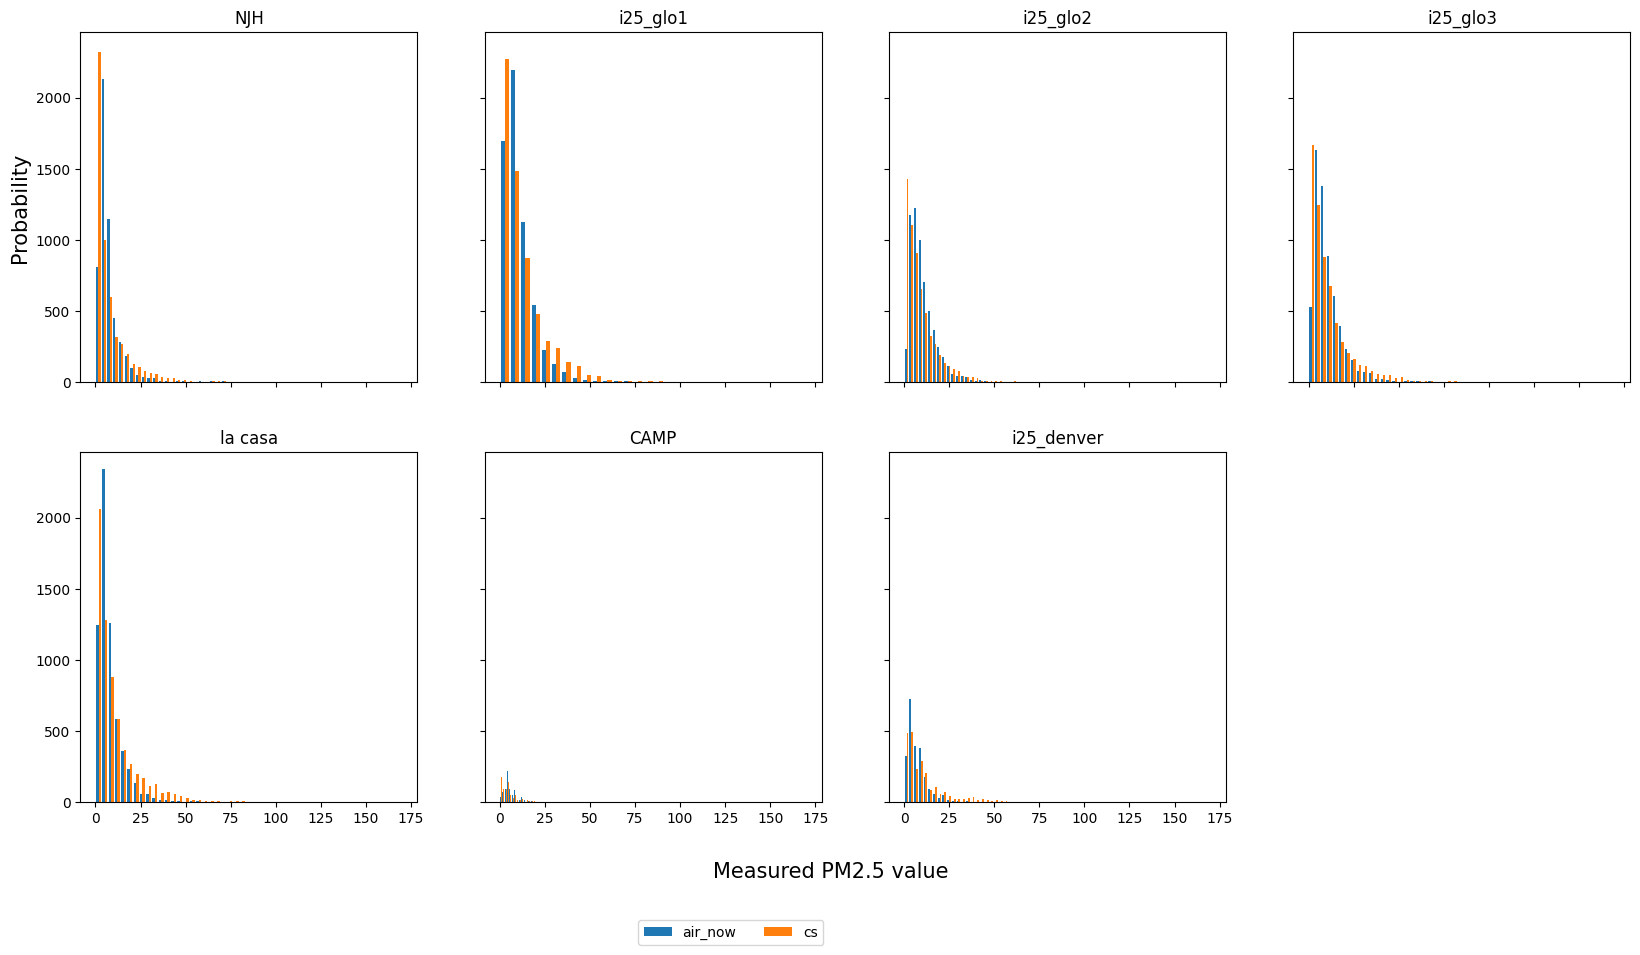

In [1029]:
labels = ['air_now','cs']

fig , [(ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)] = plt.subplots(nrows = 2,ncols = 4,sharex = True,sharey = True,
                                                                figsize = (20,10))

ax1.hist(njh_data[['pm_airnow','pm_cs']],bins = bin_size(len(njh_data)))
ax1.set_title('NJH')

ax2.hist(i25_glo1_data[['pm_airnow','pm_cs']],bins = bin_size(len(i25_glo1_data)))
ax2.set_title('i25_glo1')

ax3.hist(i25_glo2_data[['pm_airnow','pm_cs']],bins = bin_size(len(i25_glo2_data)))
ax3.set_title('i25_glo2')

ax4.hist(i25_glo3_data[['pm_airnow','pm_cs']],bins = bin_size(len(i25_glo3_data)))
ax4.set_title('i25_glo3')

ax5.hist(lacasa_data[['pm_airnow','pm_cs']],bins = bin_size(len(lacasa_data)))
ax5.set_title('la casa')

ax6.hist(camp_data [['pm_airnow','pm_cs']],bins = bin_size(len(camp_data)))
ax6.set_title('CAMP')

ax7.hist(i25_denver_data[['pm_airnow','pm_cs']],bins = bin_size(len(i25_denver_data)))
ax7.set_title('i25_denver')

ax8.axis("off")

ax1.set_ylabel("Probability", size=15)
fig.text(0.5, 0.04, "Measured PM2.5 value", ha="center", va="center", size=15)
fig.legend(
    labels,
    loc="lower right",
    bbox_to_anchor=(0.5, -0.04),
    ncol=len(labels),
    bbox_transform=fig.transFigure,
)
plt.show()

## WEEKENDS

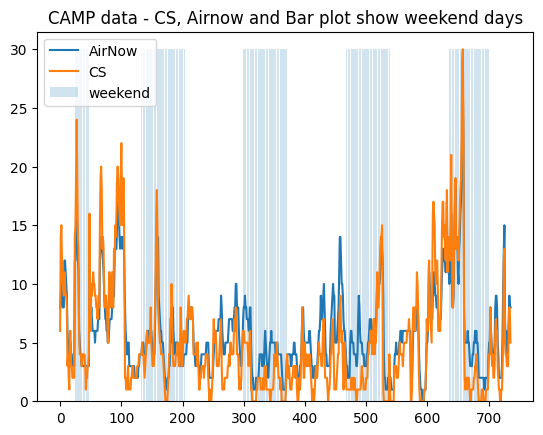

In [1030]:
plt.plot(camp_data["pm_airnow"], label="AirNow")
plt.plot(camp_data["pm_cs"], label="CS")
plt.bar(
    x=range(0, len(camp_data)),
    height=[x * 30 for x in camp_data["weekend"]],
    alpha=0.2,
    label="weekend",
)

plt.title("CAMP data - CS, Airnow and Bar plot show weekend days")
plt.legend()
plt.show()

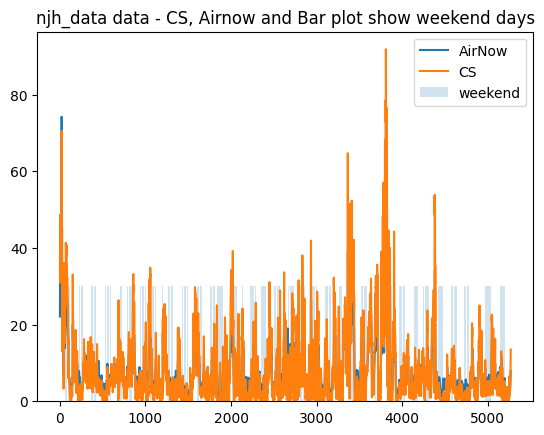

In [1031]:
plt.plot(njh_data["pm_airnow"], label="AirNow")
plt.plot(njh_data["pm_cs"], label="CS")
plt.bar(
    x=range(0, len(njh_data)),
    height=[x * 30 for x in njh_data["weekend"]],
    alpha=0.2,
    label="weekend",
)

plt.title("njh_data data - CS, Airnow and Bar plot show weekend days")
plt.legend()
plt.show()

## MODEL BUILDING

In [1088]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [1033]:
def RMSE(y_true,y_preds) :
    return round(mean_squared_error(y_true,y_preds,squared = False),2)

In [1057]:
def get_disaggregated_metrics(df,preds = None,y_preds = False) :
    '''
     Disaggregate evaluation metrics into locations
     '''
    result = {}
    if y_preds == True :
        for sensor in df['cs_sensor'].unique() :
            sensor_data = df[df['cs_sensor'] == sensor ]
            sensor_pm_cs = preds[df[df['cs_sensor'] == sensor].index]
            sensor_pm_airnow = df[df['cs_sensor'] == sensor]['pm_airnow']
            rmse =RMSE(sensor_pm_airnow,sensor_pm_cs)
            result[sensor] = rmse
    else :
        for sensor in df['cs_sensor'].unique() :
            sensor_data = df[df['cs_sensor'] == sensor ]
            sensor_pm_cs = sensor_data['pm_cs']
            sensor_pm_airnow = sensor_data['pm_airnow']
            
            rmse = RMSE(sensor_pm_airnow,sensor_pm_cs)
            result[sensor] = rmse
                    
    return {'rsme' : result}

In [1035]:
re_training_df[re_training_df['cs_sensor'] == 'NJH'].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5261, 5262, 5263, 5264, 5265, 5266, 5267, 5268, 5269, 5270],
           dtype='int64', length=5271)

In [1036]:
re_training_df

,airnow_sensor,longitude,latitude,a_road_500,pm_cs,temp,humidity,pm_airnow,Datetime,cs_sensor,Time,month,weekend,sin_time,cos_time,sin_month,cos_month
0,NJH,-104.939925,39.738578,1.995,33.6167,60.0380,65.0850,22.10,2018-08-20 01:00:00,NJH,1,8,0,0.220297,0.141451,0.518027,-0.076184
1,NJH,-104.939925,39.738578,1.995,38.2333,58.5170,67.1150,27.10,2018-08-20 02:00:00,NJH,2,8,0,0.238054,-0.108947,0.518027,-0.076184
2,NJH,-104.939925,39.738578,1.995,43.3500,57.3830,71.1717,28.85,2018-08-20 03:00:00,NJH,3,8,0,0.036945,-0.259179,0.518027,-0.076184
3,NJH,-104.939925,39.738578,1.995,48.7000,56.5460,74.7317,34.60,2018-08-20 04:00:00,NJH,4,8,0,-0.198130,-0.171123,0.518027,-0.076184
4,NJH,-104.939925,39.738578,1.995,39.2500,55.6820,79.2033,31.50,2018-08-20 05:00:00,NJH,5,8,0,-0.251046,0.074263,0.518027,-0.076184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29724,la_casa,-105.005191,39.779467,1.727,1.9518,68.7260,46.2100,4.10,2019-05-27 20:00:00,la_casa,20,5,0,0.239009,0.106836,-0.502092,0.148525
29725,la_casa,-105.005191,39.779467,1.727,2.4398,61.4498,81.8610,4.30,2019-05-27 21:00:00,la_casa,21,5,0,0.219036,-0.143395,-0.502092,0.148525
29726,la_casa,-105.005191,39.779467,1.727,0.5536,56.7620,94.9717,3.30,2019-05-27 22:00:00,la_casa,22,5,0,-0.002317,-0.261789,-0.502092,0.148525
29727,la_casa,-105.005191,39.779467,1.727,0.4335,56.0734,96.4948,2.70,2019-05-27 23:00:00,la_casa,23,5,0,-0.221540,-0.139495,-0.502092,0.148525


In [1037]:
def model_feature(df) :
    new_df = df.drop(['airnow_sensor','cs_sensor','longitude','latitude','Time','month'],axis = 1)
    new_df = new_df.set_index('Datetime')
    return new_df

In [1038]:
training_data = model_feature(re_training_df)

In [1039]:
training_data.head()

,a_road_500,pm_cs,temp,humidity,pm_airnow,weekend,sin_time,cos_time,sin_month,cos_month
Datetime,,,,,,,,,,
2018-08-20 01:00:00,1.995,33.6167,60.038,65.0850,22.10,0,0.220297,0.141451,0.518027,-0.076184
2018-08-20 02:00:00,1.995,38.2333,58.517,67.1150,27.10,0,0.238054,-0.108947,0.518027,-0.076184
2018-08-20 03:00:00,1.995,43.3500,57.383,71.1717,28.85,0,0.036945,-0.259179,0.518027,-0.076184
2018-08-20 04:00:00,1.995,48.7000,56.546,74.7317,34.60,0,-0.198130,-0.171123,0.518027,-0.076184
2018-08-20 05:00:00,1.995,39.2500,55.682,79.2033,31.50,0,-0.251046,0.074263,0.518027,-0.076184


In [1040]:
test_data = model_feature(full_test_data)

In [1041]:
baseline_training_rmse = RMSE(training_data['pm_airnow'],training_data['pm_cs'])

print(f'baseline training rmse : {baseline_training_rmse}')

baseline training rmse : 5.51


In [1042]:
baseline_test_rmse = RMSE(test_data['pm_airnow'],test_data['pm_cs'])

print(f'baseline test rmse : {baseline_test_rmse}')

baseline test rmse : 7.06


In [1043]:
baseline_disagg_train_metrics = get_disaggregated_metrics(re_training_df)

print('Disaggregrated training rmse')
baseline_disagg_train_metrics 

Disaggregrated training rmse


{'rsme': {'NJH': 4.36,
  'i25_glo_1': 6.67,
  'i25_glo_2': 4.55,
  'i25_glo_3': 5.41,
  'la_casa': 6.06}}

In [1044]:
baseline_disagg_test_metrics = get_disaggregated_metrics(full_test_data)

print('Disaggregrated test rmse')
baseline_disagg_test_metrics 

Disaggregrated test rmse


{'rsme': {'CAMP': 2.41, 'i25_denver': 8.01}}

## Obtaining model
**model_1**: CS PM2.5 <br>
**model_2**: CS PM2.5, temperature, humidity <br>
**model_3**: CS PM2.5, temprature, humidity, road length <br>
**model_4**: CS PM2.5, temprature, humidity, road length, hour, month <br>
**model_5**: CS PM2.5, temprature, humidity, road length, hour, mont, weekend <br>

In [1045]:
model_features = {
    "model_1": ["pm_cs"],
    "model_2": ["pm_cs", "temp", "humidity"],
    "model_3": ["pm_cs", "temp", "humidity", "a_road_500"],
    "model_4": [
        "pm_cs",
        "temp",
        "humidity",
        "a_road_500",
        "sin_time",
        "cos_time",
        "sin_month",
        "cos_month",
    ],
    "model_5": [
        "pm_cs",
        "temp",
        "humidity",
        "a_road_500",
        "sin_time",
        "cos_time",
        "sin_month",
        "cos_month",
        "weekend",
    ],
}

In [1046]:
# function to split data

def split_data(feature,train_data,test_data) :
        x_train = train_data[feature]
        y_train  = train_data['pm_airnow']
        x_test = test_data[feature]
        y_test = test_data['pm_airnow']
        return x_train,x_test,y_train,y_test

In [1047]:
def train_model(model,train_data,test_data,model_features):
    estimator = model
    for key,values in model_features.items() :
        x_train,x_test,y_train,y_test = split_data(values,train_data,test_data)
        print(f'Training {model} model')
        print(f'{key} features : {values}')
        estimator.fit(x_train,y_train)
        train_preds = model.predict(x_train)
        test_preds = model.predict(x_test)
        model_training_rmse = RMSE(y_train,train_preds)
        print(f'Model train rmse : {model_training_rmse}')
        model_test_rmse = RMSE(y_test,test_preds)
        print(f'Model test rmse : {model_test_rmse}')
        print('===========================================================================================')

In [1048]:
# linear regression
train_model(LinearRegression(),training_data,test_data,model_features)

Training LinearRegression() model
model_1 features : ['pm_cs']
Model train rmse : 3.34
Model test rmse : 4.06
Training LinearRegression() model
model_2 features : ['pm_cs', 'temp', 'humidity']
Model train rmse : 3.27
Model test rmse : 4.44
Training LinearRegression() model
model_3 features : ['pm_cs', 'temp', 'humidity', 'a_road_500']
Model train rmse : 3.14
Model test rmse : 9.16
Training LinearRegression() model
model_4 features : ['pm_cs', 'temp', 'humidity', 'a_road_500', 'sin_time', 'cos_time', 'sin_month', 'cos_month']
Model train rmse : 3.12
Model test rmse : 16.72
Training LinearRegression() model
model_5 features : ['pm_cs', 'temp', 'humidity', 'a_road_500', 'sin_time', 'cos_time', 'sin_month', 'cos_month', 'weekend']
Model train rmse : 3.1
Model test rmse : 16.81


The best model based on `LinearRegression()` is `model_1`

In [1049]:
# RandomForestRegressor
train_model(RandomForestRegressor(),training_data,test_data,model_features)

Training RandomForestRegressor() model
model_1 features : ['pm_cs']
Model train rmse : 1.61
Model test rmse : 4.38
Training RandomForestRegressor() model
model_2 features : ['pm_cs', 'temp', 'humidity']
Model train rmse : 1.14
Model test rmse : 4.33
Training RandomForestRegressor() model
model_3 features : ['pm_cs', 'temp', 'humidity', 'a_road_500']
Model train rmse : 1.02
Model test rmse : 3.58
Training RandomForestRegressor() model
model_4 features : ['pm_cs', 'temp', 'humidity', 'a_road_500', 'sin_time', 'cos_time', 'sin_month', 'cos_month']
Model train rmse : 0.84
Model test rmse : 3.63
Training RandomForestRegressor() model
model_5 features : ['pm_cs', 'temp', 'humidity', 'a_road_500', 'sin_time', 'cos_time', 'sin_month', 'cos_month', 'weekend']
Model train rmse : 0.83
Model test rmse : 3.59


The best model obtained is from based on random forest is `model_4` which is overall best model

The result for our best model is:

`train RMSE= 0.85` <br>
`test RMSE= 3.46`

## Training model with model_4 features

In [1050]:
# splitting dataset
x_train,x_test,y_train,y_test = split_data(model_features['model_4'],training_data,test_data)

In [1051]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [1052]:
# making predictions
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

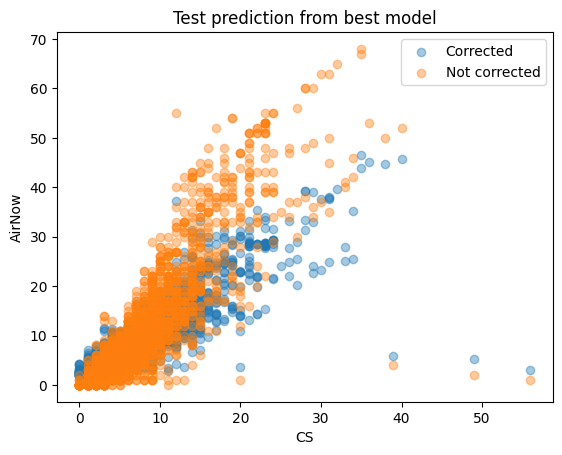

In [1053]:
# visualising predictions
plt.scatter(
    test_data["pm_airnow"],
    test_preds,
    alpha=0.4,
    label="Corrected",
)
plt.scatter(
    test_data["pm_airnow"], test_data["pm_cs"], alpha=0.4, label="Not corrected"
)
plt.ylabel("AirNow")
plt.xlabel("CS")
plt.title("Test prediction from best model")
plt.legend()
plt.show()

## Feature importance

In [1054]:
feature_importances = model.feature_importances_

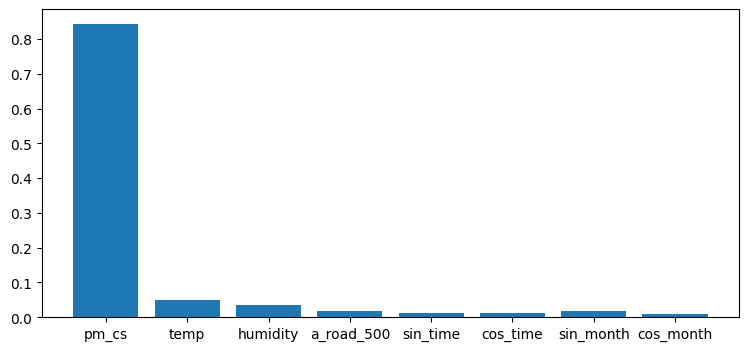

In [1055]:
fig = plt.figure(figsize=(9, 4))
plt.bar(model_features["model_4"], feature_importances)
plt.show()

he most important feature for our random forest correction model is the `PM 2.5`readings from the low-cost sensor

In [1058]:
# disaggregrated errors in each location

model_disagg_train_metrics = get_disaggregated_metrics(re_training_df,preds=train_preds,y_preds = True)
model_disagg_test_metrics = get_disaggregated_metrics(full_test_data,test_preds,y_preds = True)

In [1076]:
print("best model train")
print(model_disagg_train_metrics)
print("baseline train")
print(baseline_disagg_train_metrics)

best model train
{'rsme': {'NJH': 0.62, 'i25_glo_1': 1.02, 'i25_glo_2': 0.94, 'i25_glo_3': 0.87, 'la_casa': 0.67}}
baseline train
{'rsme': {'NJH': 4.36, 'i25_glo_1': 6.67, 'i25_glo_2': 4.55, 'i25_glo_3': 5.41, 'la_casa': 6.06}}


In [1077]:
print("best model test")
print(model_disagg_test_metrics)
print("baseline test")
print(baseline_disagg_test_metrics)

best model test
{'rsme': {'CAMP': 1.99, 'i25_denver': 4.02}}
baseline test
{'rsme': {'CAMP': 2.41, 'i25_denver': 8.01}}


the training results are obtained from data and locations that have already been seen by the model. Hence we have results that are over-optimistic for those locations. The model we have so far, however, shows usefulness in that it reduces error on test data (which are locations that have not been seen by our our model).

To this aim, am using leave-one-location-out cross validation. This cross validation helps us to understand how well our model generalises into new locations corresponding to the same time coverage of our training data.


In [1084]:
lolo_validation_errors = {}
locations = re_training_df["cs_sensor"].unique()

for leave_sensor in locations:

    train = re_training_df[re_training_df["cs_sensor"] != leave_sensor]
    validation = re_training_df[re_training_df["cs_sensor"] == leave_sensor]

    rf = RandomForestRegressor()

    x_train, y_train = train[model_features['model_4']], train["pm_airnow"]
    x_val, y_val = validation[model_features['model_4']], validation["pm_airnow"]

    rf.fit(x_train, y_train)

    y_hat_val = model.predict(x_val)

    error = RMSE(y_val, y_hat_val)
    lolo_validation_errors[leave_sensor] = error

In [1085]:
print("cross validation model train")
print(lolo_validation_errors)
print("baseline train")
print(baseline_disagg_train_metrics)

cross validation model train
{'NJH': 0.62, 'i25_glo_1': 1.02, 'i25_glo_2': 0.94, 'i25_glo_3': 0.87, 'la_casa': 0.67}
baseline train
{'rsme': {'NJH': 4.36, 'i25_glo_1': 6.67, 'i25_glo_2': 4.55, 'i25_glo_3': 5.41, 'la_casa': 6.06}}


In [1087]:
# saving model
from joblib import dump
dump(model,'sensor_calibration_model.joblib')

['sensor_calibration_model.joblib']